# Домашнее задание № 4
## Задача на классификацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Считаем обучающую и тестовую выборки

In [2]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')

In [3]:
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')

In [4]:
#df_targ = pd.read_csv('sample_submission.csv', sep=',', encoding='utf8')

In [5]:
# df_test = pd.merge(
#     df_test,
#     df_targ,
#     left_on='_id',
#     right_on='_id'
# )

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [8]:
df = df_test.append(df_train).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [9]:
df.head()

,_id,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default,duration,education,...,job,loan,marital,month,nr.employed,pdays,poutcome,previous,sample,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,1,-46.2,92.893,cellular,mon,no,371,high.school,...,technician,yes,married,may,5099.1,999,failure,1,test,NaN
1,ccac3879652b08cb8b44c1920fd93afa,55,2,-36.4,93.994,telephone,thu,unknown,285,unknown,...,unknown,no,married,may,5191.0,999,nonexistent,0,test,NaN
2,fcccab4d7a76f70647f015f2c84c2af8,33,1,-46.2,92.893,cellular,fri,no,52,basic.9y,...,blue-collar,no,married,may,5099.1,999,failure,1,test,NaN
3,ed8399278c30678dab739045fa12b440,36,4,-41.8,94.465,telephone,fri,no,355,high.school,...,admin.,no,married,jun,5228.1,999,nonexistent,0,test,NaN
4,1d4d62ac5cabcb48bac7112813f290cb,27,2,-42.7,93.918,cellular,fri,no,189,high.school,...,housemaid,no,married,jul,5228.1,999,nonexistent,0,test,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
campaign          41188 non-null int64
cons.conf.idx     41188 non-null float64
cons.price.idx    41188 non-null float64
contact           41188 non-null object
day_of_week       41188 non-null object
default           41188 non-null object
duration          41188 non-null int64
education         41188 non-null object
emp.var.rate      41188 non-null float64
euribor3m         41188 non-null float64
housing           41188 non-null object
job               41188 non-null object
loan              41188 non-null object
marital           41188 non-null object
month             41188 non-null object
nr.employed       41188 non-null float64
pdays             41188 non-null int64
poutcome          41188 non-null object
previous          41188 non-null int64
sample            41188 non-null object
target     

In [11]:
for i in df.columns:
    if len(set(df[i]))< 100:
        print('='*10)
        print(i)
        print(set(df[i]))
        print('\n')

age
{17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98}


campaign
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56}


cons.conf.idx
{-40.4, -40.0, -39.8, -50.8, -49.5, -50.0, -47.1, -46.2, -45.9, -42.7, -41.8, -40.3, -40.8, -42.0, -38.3, -36.4, -37.5, -34.6, -36.1, -34.8, -31.4, -30.1, -29.8, -33.6, -33.0, -26.9}


cons.price.idx
{93.798, 94.055, 92.893, 92.713, 92.756, 93.994, 93.2, 93.075, 93.369, 93.749, 94.027, 93.918, 94.465, 92.649, 92.379, 94.767, 94.215, 92.843, 92.201, 92.963, 92.469, 92.431, 94.199, 93.444, 94.601, 93.876}


contact
{'cellular', 'telephone'}


day_of_week
{'mon', 'fri', 'tue', 'wed', 'thu'}


d

Поиск категориальных признаков

In [12]:
a = max(df.count())

for i in df.columns:
    if  len(set(df[i]))/a < 0.005 and ('object' in str(df[i].dtype)):
        print('='*10)
        print(i)
        print(set(df[i]))
        print(len(set(df[i]))/a)
        print('\n')

contact
{'cellular', 'telephone'}
4.855783237836263e-05


day_of_week
{'mon', 'fri', 'tue', 'wed', 'thu'}
0.00012139458094590657


default
{'no', 'unknown', 'yes'}
7.283674856754395e-05


education
{'illiterate', 'professional.course', 'basic.4y', 'university.degree', 'basic.9y', 'high.school', 'unknown', 'basic.6y'}
0.00019423132951345052


housing
{'no', 'unknown', 'yes'}
7.283674856754395e-05


job
{'services', 'housemaid', 'unemployed', 'blue-collar', 'retired', 'self-employed', 'student', 'technician', 'unknown', 'admin.', 'entrepreneur', 'management'}
0.0002913469942701758


loan
{'no', 'unknown', 'yes'}
7.283674856754395e-05


marital
{'married', 'unknown', 'single', 'divorced'}
9.711566475672526e-05


month
{'sep', 'may', 'jun', 'oct', 'apr', 'dec', 'mar', 'jul', 'aug', 'nov'}
0.00024278916189181314


poutcome
{'nonexistent', 'failure', 'success'}
7.283674856754395e-05


sample
{'test', 'train'}
4.855783237836263e-05




In [13]:
for i in ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    print('')
    print(i)
    print(df[i].value_counts())
    print('_____________________________________________')


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
_____________________________________________

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
_____________________________________________

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
_____________________________________________

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
_____________________________________________

housing
yes        21576
no         1862

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
campaign          41188 non-null int64
cons.conf.idx     41188 non-null float64
cons.price.idx    41188 non-null float64
contact           41188 non-null object
day_of_week       41188 non-null object
default           41188 non-null object
duration          41188 non-null int64
education         41188 non-null object
emp.var.rate      41188 non-null float64
euribor3m         41188 non-null float64
housing           41188 non-null object
job               41188 non-null object
loan              41188 non-null object
marital           41188 non-null object
month             41188 non-null object
nr.employed       41188 non-null float64
pdays             41188 non-null int64
poutcome          41188 non-null object
previous          41188 non-null int64
sample            41188 non-null object
target     

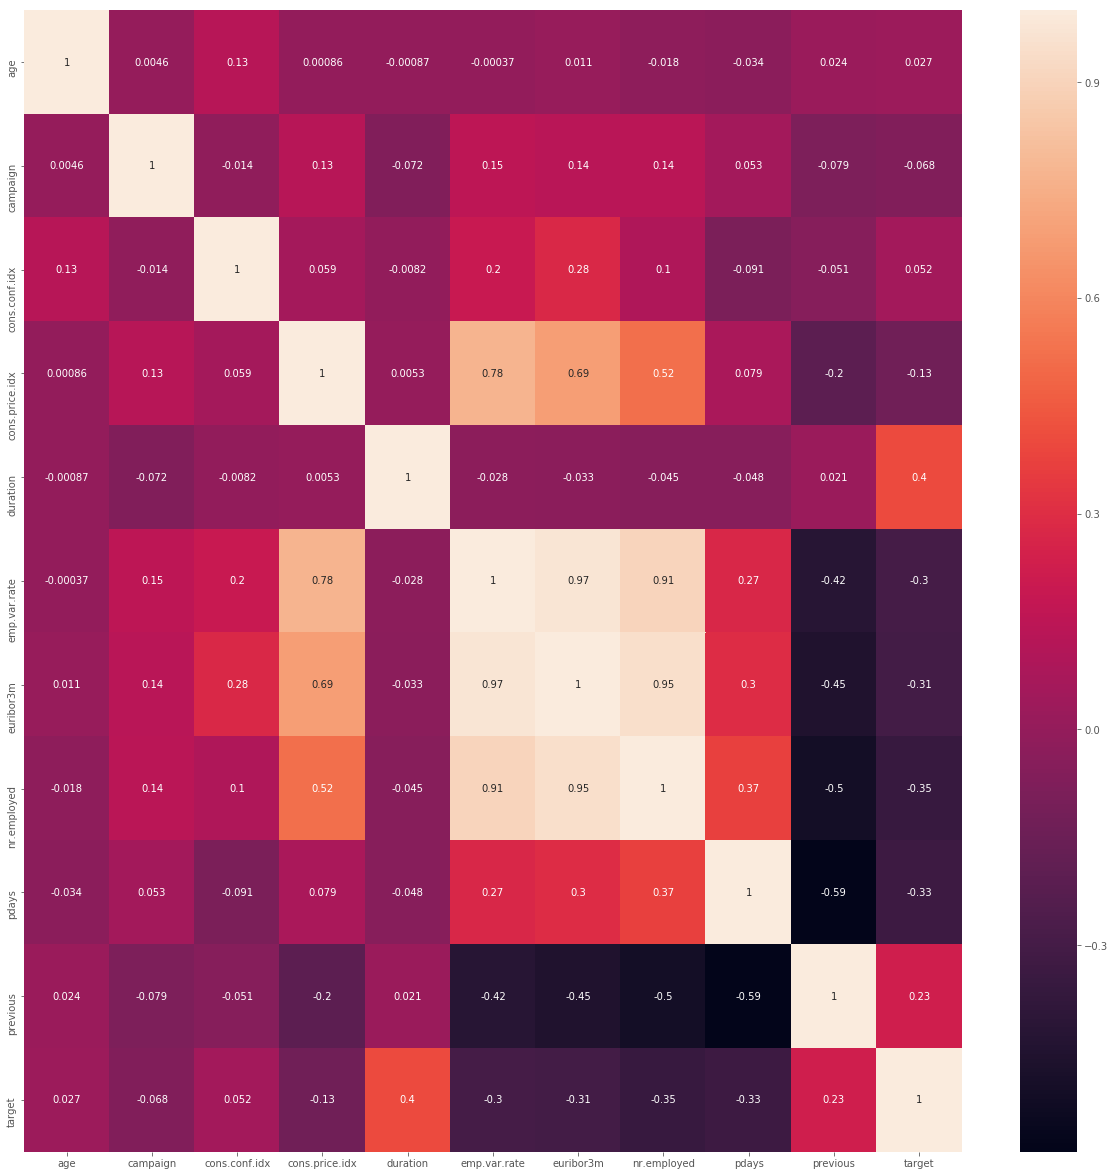

In [15]:
f, ax = plt.subplots(figsize = (21, 21))
sns.heatmap(df.corr(), ax = ax, annot=True)

In [16]:
# Удаляем сильно скоррелированные признаки
df = df.drop(['previous'], axis=1)    
df = df.drop(['emp.var.rate'], axis=1)
df = df.drop(['euribor3m'], axis=1)

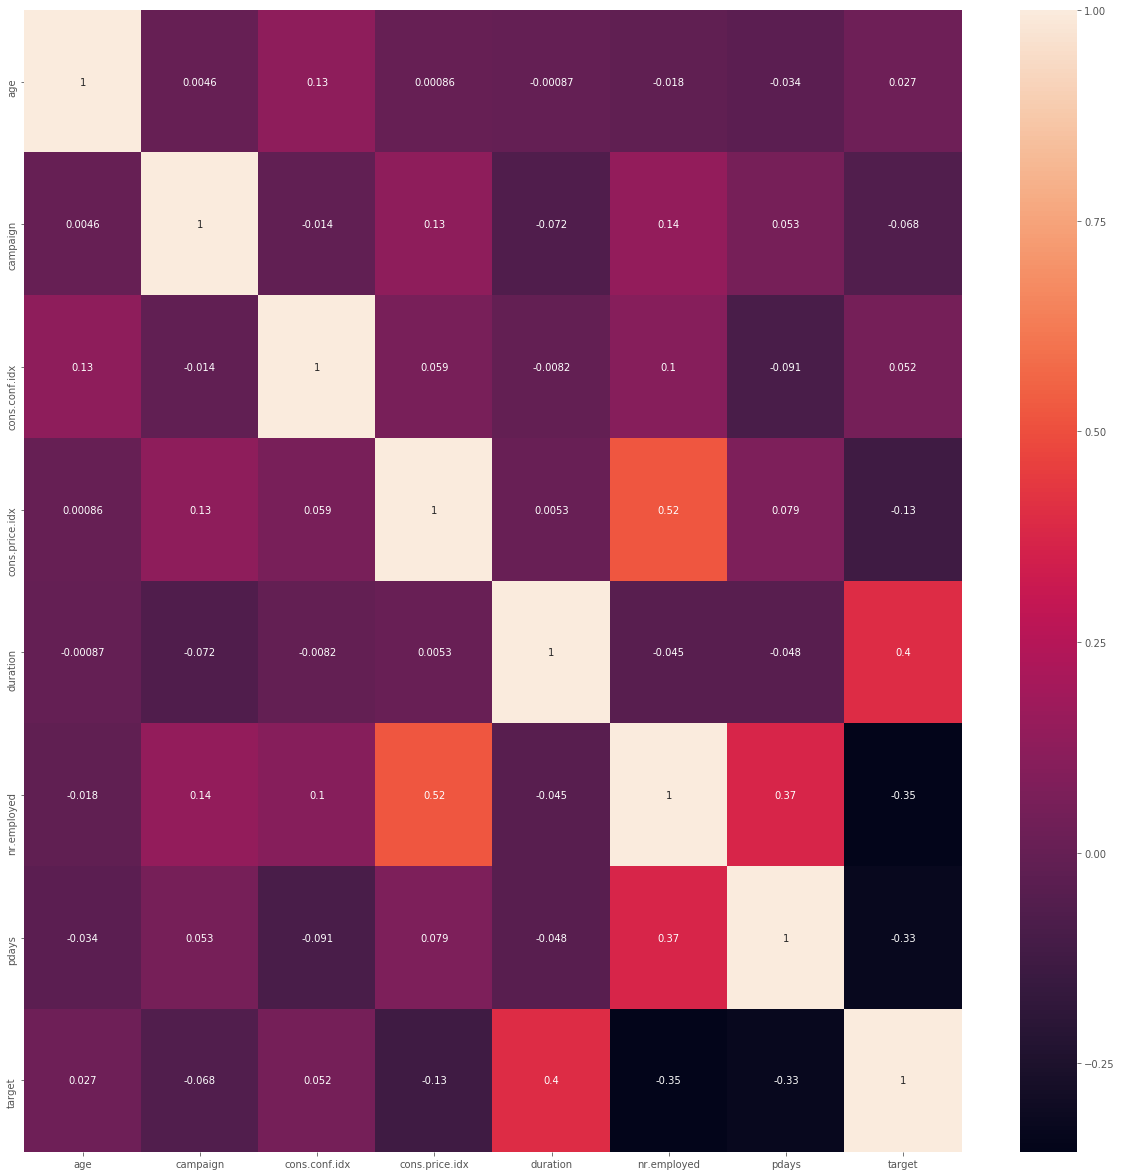

In [17]:
f, ax = plt.subplots(figsize = (21, 21))
sns.heatmap(df.corr(), ax = ax, annot=True)

In [18]:
def preproc_data(df_input):
    df_output = df_input.copy()

    # Удаляем идентификатор _id
    if '_id' in df_output.columns:
        df_output = df_output.drop(['_id'], axis=1)
        
        
    # Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'poutcome'])
    
    return df_output

In [19]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

Отделим целевую переменную и остальные признаки

In [20]:
X = df_train_preproc[df_train_preproc.columns[df_train_preproc.columns != 'target']].values
X_test = df_test_preproc[df_test_preproc.columns[df_test_preproc.columns != 'target']].values

Y = df_train_preproc.loc[:, 'target'].values
#Y_test = df_test_preproc.loc[:, 'target'].values

In [21]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42 
#train test split is a library to split Split data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Обучение и оценка качества разных моделей

In [22]:
# Деревья решений

from sklearn.tree import DecisionTreeClassifier
for i in range(2,6):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train, Y_train)
    y_clf = clf.predict(X_test)
    y_clf_proba = clf.predict_proba(X_test)
    #print(Y_test)
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    
    print(i)
    print(accuracy_score(Y_test, y_clf))
    print(precision_score(Y_test, y_clf))
    print(recall_score(Y_test, y_clf))
    print('\n')

2
0.9049096304289183
0.6202090592334495
0.4223013048635824


3
0.9088211491772322
0.5981198589894242
0.6037959667852907


4
0.9155651470191529
0.6854700854700855
0.47568208778173193


5
0.9131373077960615
0.6866791744840526
0.43416370106761565




In [23]:
# Выбираем max_depth = 4

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, Y_train)
y_clf = clf.predict(X_test)
y_clf_proba = clf.predict_proba(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
    
print(accuracy_score(Y_test, y_clf))
print(precision_score(Y_test, y_clf))
print(recall_score(Y_test, y_clf))

0.9155651470191529
0.6854700854700855
0.47568208778173193


In [24]:
# Метод k ближайших соседей

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(X_train, Y_train)
y_knn = knn.predict(X_test)
y_knn_proba = knn.predict_proba(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(Y_test, y_knn))
print(precision_score(Y_test, y_knn))
print(recall_score(Y_test, y_knn))

0.8804963582411653
0.47406513872135103
0.46619217081850534


In [25]:
# Логистическая регрессия

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2')
reg.fit(X_train, Y_train)
y_reg = reg.predict(X_test)
y_reg_proba = reg.predict_proba(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(Y_test, y_reg))
print(precision_score(Y_test, y_reg))
print(recall_score(Y_test, y_reg))

0.9120582681413542
0.6847195357833655
0.4199288256227758


(-0.01, 1.01)

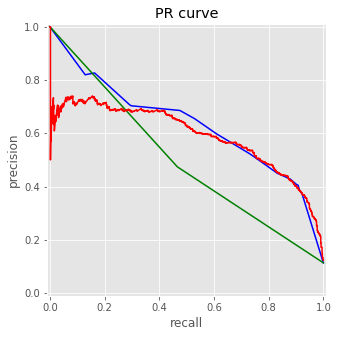

In [26]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

precision_clf, recall_clf, thresholds_clf = precision_recall_curve(Y_test, y_clf_proba[:,1])
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(Y_test, y_knn_proba[:,1])
precision_reg, recall_reg, thresholds_reg = precision_recall_curve(Y_test, y_reg_proba[:,1])

plt.figure(figsize=(5, 5))
plt.plot(recall_clf, precision_clf,'b')
plt.plot(recall_knn, precision_knn,'g')
plt.plot(recall_reg, precision_reg, 'r')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

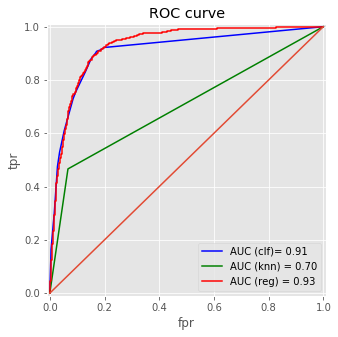

In [27]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

fpr_clf, tpr_clf, thresholds_clf = roc_curve(Y_test, y_clf_proba[:,1])
roc_auc_clf = auc(fpr_clf, tpr_clf)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, y_knn_proba[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_reg, tpr_reg, thresholds_reg = roc_curve(Y_test, y_reg_proba[:,1])
roc_auc_reg = auc(fpr_reg, tpr_reg)

plt.figure(figsize=(5, 5))
plt.plot(fpr_clf, tpr_clf,'b', label='AUC (clf)= %0.2f'% roc_auc_clf)
plt.plot(fpr_knn, tpr_knn,'g', label='AUC (knn) = %0.2f'% roc_auc_knn)
plt.plot(fpr_reg, tpr_reg,'r', label='AUC (reg) = %0.2f'% roc_auc_reg)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [28]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Делаем k-fold (10 фолдов) кросс-валидацию каждой модели
# Считаем средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

for train_idx, test_idx in cv.split(X, Y):
    print('=== Очередной фолд ===')
    print('Обучение - {} объектов, валидация - {} объектов'.format(train_idx.shape[0], test_idx.shape[0]))
    print('Доля откликов: обучение - {}, валидация - {}'.format(Y[train_idx].mean(), Y[test_idx].mean()))
    print('\n')
    
scores = cross_val_score(
    reg,
    X,
    Y,
    scoring='roc_auc',
    cv=10
)
scores
scores.mean()

=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22241 объектов, валидация - 2471 объектов
Доля откликов: обучение - 0.11276471381682478, валидация - 0.11290975313638203


=== Очередной фолд ===
Обучение - 22241 объектов, валидаци

0.9250947405152499

In [29]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Делаем k-fold (10 фолдов) кросс-валидацию каждой модели
# Считаем средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

for train_idx, test_idx in cv.split(X, Y):
    print('=== Очередной фолд ===')
    print('Обучение - {} объектов, валидация - {} объектов'.format(train_idx.shape[0], test_idx.shape[0]))
    print('Доля откликов: обучение - {}, валидация - {}'.format(Y[train_idx].mean(), Y[test_idx].mean()))
    print('\n')
    
scores = cross_val_score(
    clf,
    X,
    Y,
    scoring='roc_auc',
    cv=10
)
scores
scores.mean()

=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22241 объектов, валидация - 2471 объектов
Доля откликов: обучение - 0.11276471381682478, валидация - 0.11290975313638203


=== Очередной фолд ===
Обучение - 22241 объектов, валидаци

0.9079013078731952

In [30]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Делаем k-fold (10 фолдов) кросс-валидацию каждой модели
# Считаем средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

for train_idx, test_idx in cv.split(X, Y):
    print('=== Очередной фолд ===')
    print('Обучение - {} объектов, валидация - {} объектов'.format(train_idx.shape[0], test_idx.shape[0]))
    print('Доля откликов: обучение - {}, валидация - {}'.format(Y[train_idx].mean(), Y[test_idx].mean()))
    print('\n')
    
scores = cross_val_score(
    knn,
    X,
    Y,
    scoring='roc_auc',
    cv=10
)
scores
scores.mean()

=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22240 объектов, валидация - 2472 объектов
Доля откликов: обучение - 0.11276978417266187, валидация - 0.11286407766990292


=== Очередной фолд ===
Обучение - 22241 объектов, валидация - 2471 объектов
Доля откликов: обучение - 0.11276471381682478, валидация - 0.11290975313638203


=== Очередной фолд ===
Обучение - 22241 объектов, валидаци

0.7114110251591683

In [31]:
# Взять лучшую модель и сделать predict для test выборки
reg = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2')
reg.fit(X_train, Y_train)
y_reg = reg.predict(X_test)
y_reg_proba = reg.predict_proba(X_test)
y_reg_proba

array([[0.31377981, 0.68622019],
       [0.99119624, 0.00880376],
       [0.99111079, 0.00888921],
       ...,
       [0.99222103, 0.00777897],
       [0.81118667, 0.18881333],
       [0.97967813, 0.02032187]])

In [32]:
# Померить roc_auc на тесте

y_reg_proba = reg.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,y_reg_proba)

0.9276431742118618